In [4]:
import tensorflow as tf
tf.__version__

'2.5.0'

3

In [47]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_X,train_y),(test_X,test_y)=fashion_mnist.load_data()

In [48]:
from collections import Counter
len(Counter(train_y))

10

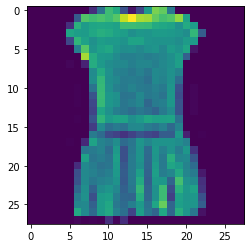

In [49]:
import matplotlib.pyplot as plt
plt.imshow(train_X[3])

In [52]:
print("sebelum proses encode:",train_y[0])
train_label=tf.keras.utils.to_categorical(train_y,num_classes=10)
test_label=tf.keras.utils.to_categorical(test_y,num_classes=10)
print("setelah encode:",test_y[1])

sebelum proses encode: 9
setelah encode: 2


In [26]:
train_input=tf.data.Dataset.from_tensor_slices((train_X,train_label)).batch(50)
test_input=tf.data.Dataset.from_tensor_slices((test_X,test_label)).batch(50)

In [27]:
input_data=tf.keras.Input([28,28])
dense=tf.keras.layers.Flatten()(input_data)

dense=tf.keras.layers.Dense(100,activation='relu')(dense)
dense=tf.keras.layers.Dense(100,activation='relu')(dense)
dense=tf.keras.layers.Dense(100,activation='relu')(dense)
dense=tf.keras.layers.Dense(100,activation='relu')(dense)

output_data=tf.keras.layers.Dense(10,activation='softmax')(dense)

In [28]:
model=tf.keras.Model(inputs=input_data,outputs=output_data)

In [29]:
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010  

In [31]:
model.fit(train_input,epochs=10)

Epoch 1/10
1200/1200 [==============================] - 6s 2ms/step - loss: 0.9553 - accuracy: 0.7653
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4738 - accuracy: 0.8310
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4296 - accuracy: 0.8456
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4012 - accuracy: 0.8550
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3854 - accuracy: 0.8609
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3664 - accuracy: 0.8674
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3539 - accuracy: 0.8714
Epoch 8/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3438 - accuracy: 0.8757
Epoch 9/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3316 - accuracy: 0.8805
Epoch 10/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.319

In [32]:
model.evaluate(test_input)

200/200 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8629


[0.398821622133255, 0.8629000186920166]

In [33]:
train_data=tf.expand_dims(train_X,-1)
test_data=tf.expand_dims(test_X,-1)

In [34]:
train_input=tf.data.Dataset.from_tensor_slices((train_data,train_label)).batch(50)
test_input=tf.data.Dataset.from_tensor_slices((test_data,test_label)).batch(50)

In [35]:
input_data=tf.keras.Input([28,28,1])

In [36]:
conv=tf.keras.layers.Conv2D(30,5,padding='SAME',activation='relu')(input_data)
conv=tf.keras.layers.Conv2D(30,5,padding='SAME',activation='relu')(conv)

In [37]:
conv=tf.keras.layers.MaxPool2D(strides=[2,2])(conv)
conv=tf.keras.layers.Conv2D(30,5,padding='SAME',activation='relu')(conv)

In [41]:
dense=tf.keras.layers.Flatten()(conv)
output_data=tf.keras.layers.Dense(10,activation='softmax')(dense)

In [42]:
model=tf.keras.Model(inputs=input_data,outputs=output_data)
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 30)        780       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 30)        22530     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 30)        22530     
_________________________________________________________________
flatten_2 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5881

In [44]:
model.fit(train_input,epochs=15)
model.evaluate(test_input)

Epoch 1/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2618 - accuracy: 0.9024
Epoch 2/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2522 - accuracy: 0.9058
Epoch 3/15
1200/1200 [==============================] - 5s 5ms/step - loss: 0.2436 - accuracy: 0.9086
Epoch 4/15
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2340 - accuracy: 0.9123
Epoch 5/15
1200/1200 [==============================] - 5s 5ms/step - loss: 0.2260 - accuracy: 0.9146
Epoch 6/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2137 - accuracy: 0.9198
Epoch 7/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2061 - accuracy: 0.9229
Epoch 8/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1951 - accuracy: 0.9270
Epoch 9/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1929 - accuracy: 0.9275
Epoch 10/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.177

[0.5086474418640137, 0.8794999718666077]